In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,InputLayer
import zipfile
import Generate_models
import importlib  
import Generate_models
importlib.reload(Generate_models)

<module 'Generate_models' from 'c:\\Users\\sarbaoui01\\Counterfactual-explanation\\Generate_models.py'>

In [2]:
outdirname = 'Datasets/adult'
zipfilename = outdirname + '.zip'
with zipfile.ZipFile(zipfilename, 'r') as unzip:
        unzip.extractall(outdirname)
raw_data = np.genfromtxt(outdirname + '/adult.data',delimiter=', ', dtype=str, invalid_raise=False)


In [3]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                    'income']

adult_data = pd.DataFrame(raw_data, columns=column_names)

In [4]:
adult_data["age"]=adult_data["age"].apply(lambda x: int(x))
adult_data["fnlwgt"]=adult_data["fnlwgt"].apply(lambda x: float(x))
adult_data["educational-num"]=adult_data["educational-num"].apply(lambda x: int(x))
adult_data["capital-gain"]=adult_data["capital-gain"].apply(lambda x: float(x))
adult_data["capital-loss"]=adult_data["capital-loss"].apply(lambda x: float(x))
adult_data["hours-per-week"]=adult_data["hours-per-week"].apply(lambda x: float(x))


In [5]:
input_features=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
output="income"


In [6]:
adult_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
32557,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K


In [10]:
model = Sequential()
model.add(InputLayer(shape=(1,14)))

model.add(Dense(150, activation='relu'))  

# Hidden layers
model.add(Dense(64, activation='relu'))  
model.add(Dense(16, activation='relu'))  
model.add(Flatten()) 
model.add(Dense(1, activation='sigmoid'))  

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  
              metrics=['accuracy'])

In [177]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1, 100)         │         1,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1, 64)          │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1, 16)          │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,021 (35.24 KB)

 Trainable params: 9,021 (35.24 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
Gm=Generate_models.Generate_model(data=adult_data,input_features=input_features,output=output,problem="classification",categorical_features=['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'gender', 'native-country','income'],test_size=0.2,n_steps_in=1,n_steps_out=1,dType="notsequence")

In [12]:
model,xtrain,ytrain,xtest,ytest,encoder,norm=Gm.build_model(model=model,epochs=30)

Epoch 1/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7868 - loss: 0.4544 - val_accuracy: 0.8385 - val_loss: 0.3580
Epoch 2/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8327 - loss: 0.3527 - val_accuracy: 0.8321 - val_loss: 0.3434
Epoch 3/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8397 - loss: 0.3415 - val_accuracy: 0.8450 - val_loss: 0.3325
Epoch 4/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8350 - loss: 0.3406 - val_accuracy: 0.8455 - val_loss: 0.3331
Epoch 5/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8380 - loss: 0.3370 - val_accuracy: 0.8380 - val_loss: 0.3349
Epoch 6/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8378 - loss: 0.3389 - val_accuracy: 0.8470 - val_loss: 0.3306
Epoch 7/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8418 - loss: 0.3339 - val_accuracy: 0.8473 - val_loss: 0.3290
Epoch 8/30
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8405 - loss: 0.3294 - val_accuracy: 0.

In [34]:
model.save("./Models/adult.keras")

In [13]:
import Cf_explanation as cfe

In [14]:
query_instance1=xtest[0]
pr1=np.array(model.predict(np.reshape(query_instance1,(1,1,14)), verbose=0)).flatten()[0]
query_instance2=xtest[80]
pr11=np.array(model.predict(np.reshape(query_instance2,(1,1,14)), verbose=0)).flatten()[0]
pr1,pr11

(0.16761024, 0.5687307)

In [15]:
population=np.concatenate((xtrain[0:50],xtest[5:50]))

In [16]:
cf = cfe.Conterfactual(
    model=model,
    query_instance=query_instance1,
    problem="classification",   # You can set this to "regression" 
    total_CFs=5,               # Number of counterfactuals you want
    number_of_features=14,
    length=1,
    permitted_features=[1,2,4,6,7,10,11,12],
    correlated_feature=[],# Assuming no correlation for now
    direction="greater"       
)

# Generate counterfactual explanations
best_population = cf.Explane(population,method="NSGA2",max_itera=100)

# Print the resulting counterfactuals
print("Counterfactual explanations generated:")
print(best_population)

filtering...: 100%|██████████| 5/5 [00:00<00:00, 5000.36it/s]

Counterfactual explanations generated:
([<Cf_explanation.Condidate object at 0x0000019047986AA0>, <Cf_explanation.Condidate object at 0x000001904DF15C00>, <Cf_explanation.Condidate object at 0x000001904DFB3400>, <Cf_explanation.Condidate object at 0x00000190479702E0>, <Cf_explanation.Condidate object at 0x0000019047967C40>], [0.10494043712614538, 0.10494043712614538, 0.10494043712614538, 0.10494043712614538, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.09203109784123441, 0.07979678825306467, 0.07979678825306467, 0.07979678825306467, 0.07979678825306467, 0.07979678825306467, 0.07979678825306467, 0.07979678825306467, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 0.07831368836887315, 

In [17]:
len(best_population[0])

5

Text(0.5, 0, 'iteration')

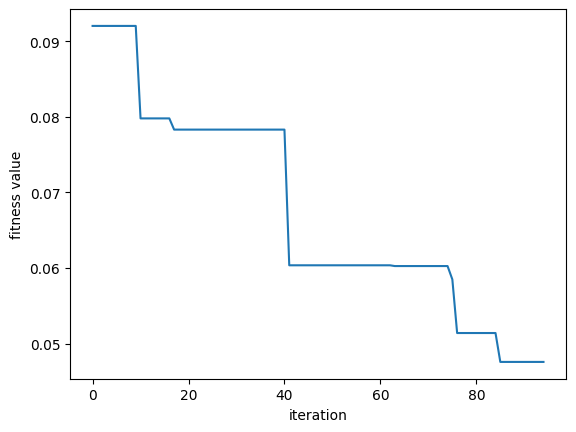

In [18]:
plt.plot(best_population[1][4:])
plt.ylabel("fitness value")
plt.xlabel("iteration")
 #fitness updates

In [19]:
input_columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation','relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
categorical_columns=['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'gender', 'native-country']

    


    


In [20]:
p=cf.Visualization(best_population[0],input_columns=input_columns,categorical_columns=categorical_columns,encoder=encoder,norm=norm[0])

In [21]:
p

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Output
0,28,Local-gov,76714,Preschool,15,Married-spouse-absent,Priv-house-serv,Husband,Other,Female,0,0,55,Trinadad&Tobago,0.167610
1,-,Federal-gov,59466,-,16,-,-,-,-,-,7688,-,60,-,0.959142
2,-,Federal-gov,13769,-,16,-,-,-,-,-,7688,-,60,-,0.958853
3,-,Federal-gov,242521,-,-,-,-,-,-,-,7688,-,60,-,0.982295
4,-,Federal-gov,242521,-,16,-,-,-,-,-,7688,-,60,-,0.979715


In [22]:
cf = cfe.Conterfactual(
    model=model,
    query_instance=query_instance1,
    problem="classification",   # You can set this to "regression" 
    total_CFs=5,               # Number of counterfactuals you want
    number_of_features=14,
    length=1,
    permitted_features=[], # do not change[age,education,marital-status,race,gender,native-country]
    correlated_feature=[],# Assuming no correlation for now
    direction="greater"       
)

# Generate counterfactual explanations
best_population = cf.Explane(population,method="GENO-TOPSIS",max_itera=100)

# Print the resulting counterfactuals
print("Counterfactual explanations generated:")
print(best_population)

filtering...: 100%|██████████| 15/15 [00:00<?, ?it/s]

Counterfactual explanations generated:
([<Cf_explanation.Condidate object at 0x000001904DF04D30>, <Cf_explanation.Condidate object at 0x000001904DEEA5C0>, <Cf_explanation.Condidate object at 0x0000019047987DF0>, <Cf_explanation.Condidate object at 0x00000190479CC130>, <Cf_explanation.Condidate object at 0x0000019047986D10>, <Cf_explanation.Condidate object at 0x000001904799A2F0>, <Cf_explanation.Condidate object at 0x0000019047984E50>, <Cf_explanation.Condidate object at 0x000001904DFA05E0>, <Cf_explanation.Condidate object at 0x00000190479E79A0>, <Cf_explanation.Condidate object at 0x00000190479D96C0>, <Cf_explanation.Condidate object at 0x0000019047986A70>, <Cf_explanation.Condidate object at 0x000001904BF0DD50>, <Cf_explanation.Condidate object at 0x00000190479B9540>, <Cf_explanation.Condidate object at 0x000001904DFA0F10>, <Cf_explanation.Condidate object at 0x000001904DFA21A0>], [0.10494043712614538, 0.10494043712614538, 0.10494043712614538, 0.10494043712614538, 0.1030460759262450

In [23]:
p=cf.Visualization(best_population[0],input_columns=input_columns,categorical_columns=categorical_columns,encoder=encoder,norm=norm[0])

In [24]:
p

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Output
0,28,Local-gov,76714,Preschool,15,Married-spouse-absent,Priv-house-serv,Husband,Other,Female,0,0,55,Trinadad&Tobago,0.167610
1,32,-,265088,-,13,-,-,-,-,-,7688,-,50,-,0.968327
2,32,-,191849,-,13,-,-,-,-,-,7688,-,50,-,0.963317
3,32,Federal-gov,191849,-,13,-,-,-,-,-,7688,-,50,-,0.963873


analysing...: 100%|██████████| 15/15 [00:00<?, ?it/s]


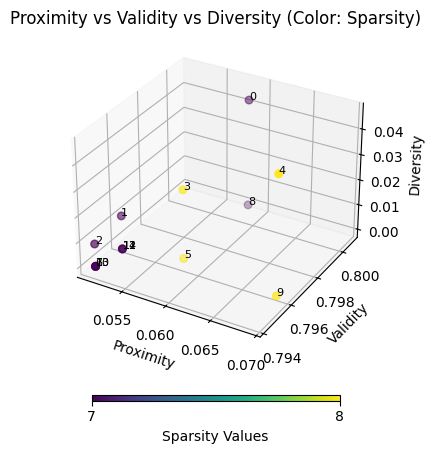

In [25]:
cf.Distribution(best_population[0])

In [57]:
pip install dice-ml

  Using cached dice_ml-0.11-py3-none-any.whl.metadata (20 kB)
  Using cached raiutils-0.4.2-py3-none-any.whl.metadata (1.4 kB)
Using cached dice_ml-0.11-py3-none-any.whl (2.5 MB)
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------- ----------------------- 4.2/10.4 MB 27.9 MB/s eta 0:00:01
   ------------------------------------ --- 9.4/10.4 MB 24.5 MB/s eta 0:00:01
   ---------------------------------------- 10.4/10.4 MB 21.5 MB/s eta 0:00:00
Using cached raiutils-0.4.2-py3-none-any.whl (17 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

In [27]:
dataset = helpers.load_adult_income_dataset()

In [28]:
dataset.head()

,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,28,Private,Bachelors,Single,White-Collar,White,Female,60,0
1,30,Self-Employed,Assoc,Married,Professional,White,Male,65,1
2,32,Private,Some-college,Married,White-Collar,White,Male,50,0
3,20,Private,Some-college,Single,Service,White,Female,35,0
4,41,Self-Employed,Some-college,Married,White-Collar,White,Male,50,0


In [99]:
# description of transformed features
adult_info = helpers.get_adult_data_info()
adult_info

{'age': 'age',
 'workclass': 'type of industry (Government, Other/Unknown, Private, Self-Employed)',
 'education': 'education level (Assoc, Bachelors, Doctorate, HS-grad, Masters, Prof-school, School, Some-college)',
 'marital_status': 'marital status (Divorced, Married, Separated, Single, Widowed)',
 'occupation': 'occupation (Blue-Collar, Other/Unknown, Professional, Sales, Service, White-Collar)',
 'race': 'white or other race?',
 'gender': 'male or female?',
 'hours_per_week': 'total work hours per week',
 'income': '0 (<=50K) vs 1 (>50K)'}

In [100]:
target = dataset["income"]
train_dataset, test_dataset, y_train, y_test = train_test_split(dataset,
                                                                target,
                                                                test_size=0.2,
                                                                random_state=0,
                                                                stratify=target)
x_train = train_dataset.drop('income', axis=1)
x_test = test_dataset.drop('income', axis=1)

In [101]:
# Step 1: dice_ml.Data
d = dice_ml.Data(dataframe=train_dataset, continuous_features=['age', 'hours_per_week'], outcome_name='income')

In [102]:
numerical = ["age", "hours_per_week"]
categorical = x_train.columns.difference(numerical)

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

transformations = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', transformations),
                      ('classifier', RandomForestClassifier())])
model = clf.fit(x_train, y_train)

In [103]:
# Using sklearn backend
m = dice_ml.Model(model=model, backend="sklearn")
# Using method=random for generating CFs
exp = dice_ml.Dice(d, m, method="random")

In [104]:
e1 = exp.generate_counterfactuals(x_test[0:1], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

Query instance (original outcome : 0)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,29,Private,HS-grad,Married,Blue-Collar,White,Female,38,0



Diverse Counterfactual set (new outcome: 1)


,age,workclass,education,marital_status,occupation,race,gender,hours_per_week,income
0,-,-,Prof-school,-,-,-,-,47,1
1,73,-,Prof-school,-,-,-,-,-,1


In [106]:
model.n_features_in_

8